In [ ]:
!cp "/content/drive/MyDrive/FDM Project/DDoSdata.csv" "/content"

cp: cannot stat '/content/drive/MyDrive/FDM Project/DDoSdata.csv': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DDoSdata.csv", low_memory=False)
df.head()

Unnamed: 0  pkSeqID         stime flgs  flgs_number proto  proto_number  \
0     1650261  1650261  1.528103e+09    e            1   tcp             1   
1     1650262  1650262  1.528103e+09    e            1   tcp             1   
2     1650263  1650263  1.528103e+09    e            1   tcp             1   
3     1650264  1650264  1.528103e+09    e            1   tcp             1   
4     1650265  1650265  1.528103e+09    e            1   tcp             1   

             saddr  sport          daddr  ... AR_P_Proto_P_DstIP  \
0  192.168.100.150  54110  192.168.100.3  ...            1.21662   
1  192.168.100.150  54112  192.168.100.3  ...            1.21662   
2  192.168.100.150  54114  192.168.100.3  ...            1.21662   
3  192.168.100.150  54116  192.168.100.3  ...            1.21662   
4  192.168.100.150  54118  192.168.100.3  ...            1.21662   

   N_IN_Conn_P_DstIP  N_IN_Conn_P_SrcIP AR_P_Proto_P_Sport  \
0                 40                 38            1.56093   
1                 40                 38            1.56107   
2                 40                 38            1.24980   
3                 40                 38            1.24986   
4                 40                 38            1.24991   

   AR_P_Proto_P_Dport  Pkts_P_State_P_Protocol_P_DestIP  \
0             1.21662                               328   
1             1.21662                               328   
2             1.21662                               328   
3             1.21662                               328   
4             1.21662                               328   

   Pkts_P_State_P_Protocol_P_SrcIP  attack  category  subcategory  
0                              308       1      DDoS         HTTP  
1                              308       1      DDoS         HTTP  
2                              308       1      DDoS         HTTP  
3                              308       1      DDoS         HTTP  
4                              308       1      DDoS         HTTP  

[5 rows x 47 columns]

## EDA

Drop columns that represent 'id' and get dataset information

In [ ]:
df.drop(['Unnamed: 0', 'pkSeqID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 45 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   stime                             float64
 1   flgs                              object 
 2   flgs_number                       int64  
 3   proto                             object 
 4   proto_number                      int64  
 5   saddr                             object 
 6   sport                             object 
 7   daddr                             object 
 8   dport                             object 
 9   pkts                              int64  
 10  bytes                             int64  
 11  state                             object 
 12  state_number                      int64  
 13  ltime                             float64
 14  seq                               int64  
 15  dur                               float64
 16  mean                              fl

Count number of null values in each column of dataset

In [ ]:
df.isna().sum()

stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 45 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   stime                             float64
 1   flgs                              object 
 2   flgs_number                       int64  
 3   proto                             object 
 4   proto_number                      int64  
 5   saddr                             object 
 6   sport                             object 
 7   daddr                             object 
 8   dport                             object 
 9   pkts                              int64  
 10  bytes                             int64  
 11  state                             object 
 12  state_number                      int64  
 13  ltime                             float64
 14  seq                               int64  
 15  dur                               float64
 16  mean                              fl

Drop some columns that have no role in definition of detecting a DDos attack

In [ ]:
df.drop(['saddr', 'daddr', 'category', 'state', 'proto', 'flgs_number', 'stime',
         'ltime', 'seq', 'mean', 'sum', 'proto_number', 'sport', 'dport'], axis=1, inplace=True)
df.head()

flgs  pkts  bytes  state_number       dur    stddev       min       max  \
0    e    10   1729             1  6.406424  0.544126  0.135347  1.223599   
1    e    10   1604             1  6.405851  0.544197  0.135375  1.223769   
2    e     8   1708             1  6.401038  1.110847  0.000000  2.221694   
3    e     8   1462             1  6.400703  1.113328  0.000000  2.226655   
4    e     8   1296             1  6.400472  1.113098  0.000000  2.226195   

   spkts  dpkts  ...  AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  \
0      6      4  ...             1.26889             1.21662   
1      6      4  ...             1.26889             1.21662   
2      5      3  ...             1.26889             1.21662   
3      5      3  ...             1.26889             1.21662   
4      5      3  ...             1.26889             1.21662   

   N_IN_Conn_P_DstIP  N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 40                 38             1.56093   
1                 40                 38             1.56107   
2                 40                 38             1.24980   
3                 40                 38             1.24986   
4                 40                 38             1.24991   

   AR_P_Proto_P_Dport  Pkts_P_State_P_Protocol_P_DestIP  \
0             1.21662                               328   
1             1.21662                               328   
2             1.21662                               328   
3             1.21662                               328   
4             1.21662                               328   

   Pkts_P_State_P_Protocol_P_SrcIP  attack  subcategory  
0                              308       1         HTTP  
1                              308       1         HTTP  
2                              308       1         HTTP  
3                              308       1         HTTP  
4                              308       1         HTTP  

[5 rows x 31 columns]

Convert categorical variables into dummy variables

In [ ]:
df = pd.get_dummies(df, columns=['subcategory'], prefix_sep='')
df = pd.get_dummies(df, columns=['flgs'], prefix_sep='')
df.head()

pkts  bytes  state_number       dur    stddev       min       max  spkts  \
0    10   1729             1  6.406424  0.544126  0.135347  1.223599      6   
1    10   1604             1  6.405851  0.544197  0.135375  1.223769      6   
2     8   1708             1  6.401038  1.110847  0.000000  2.221694      5   
3     8   1462             1  6.400703  1.113328  0.000000  2.226655      5   
4     8   1296             1  6.400472  1.113098  0.000000  2.226195      5   

   dpkts  sbytes  ...  subcategoryNormal  subcategoryTCP  subcategoryUDP  \
0      4     963  ...                  0               0               0   
1      4     838  ...                  0               0               0   
2      3    1008  ...                  0               0               0   
3      3     762  ...                  0               0               0   
4      3     596  ...                  0               0               0   

   flgse  flgse &  flgse *  flgse d  flgse g  flgse s  flgseU  
0      1        0        0        0        0        0       0  
1      1        0        0        0        0        0       0  
2      1        0        0        0        0        0       0  
3      1        0        0        0        0        0       0  
4      1        0        0        0        0        0       0  

[5 rows x 40 columns]

Correlation between each pair of columns

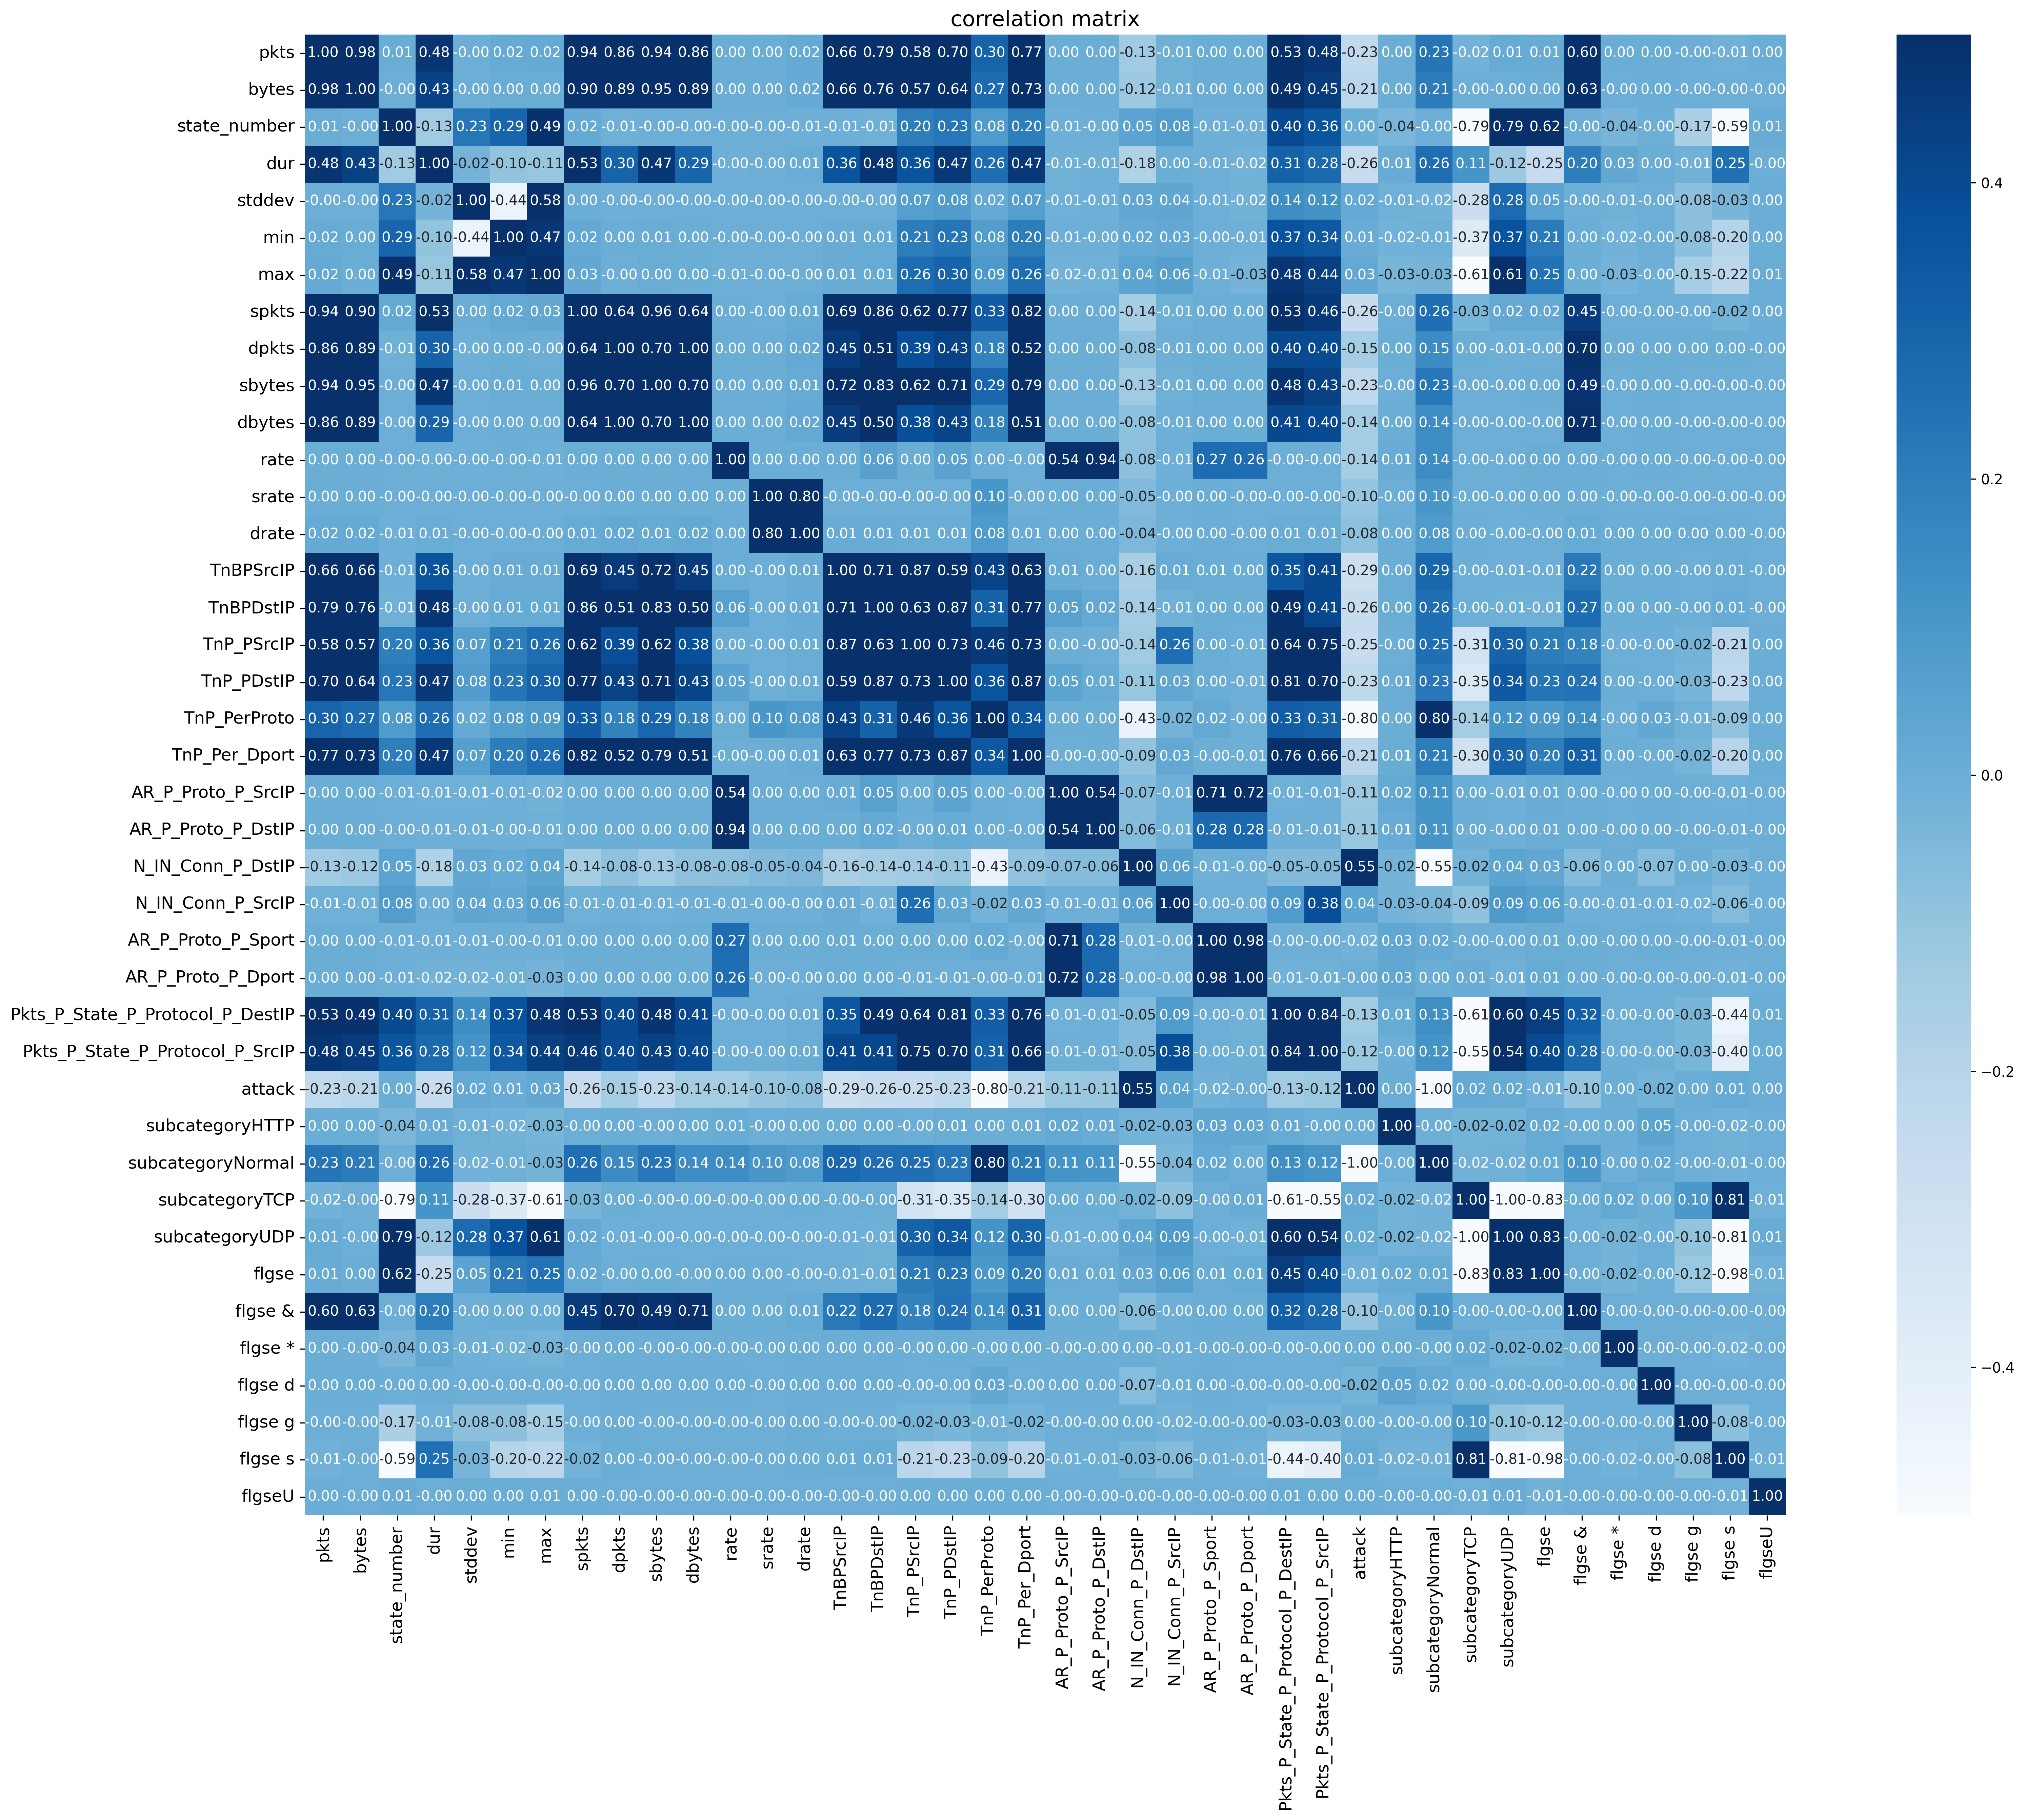

In [ ]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True,
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=12)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=12)

ax.set_title('correlation matrix', fontsize=15)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=500)

Drop columns with high correlation (only one column between two columns)

In [ ]:
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['bytes', 'sbytes', 'dbytes', 'AR_P_Proto_P_Dport', 'subcategoryNormal', 'subcategoryUDP', 'flgse s']


<ipython-input-10-83afdfbf1a8d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [ ]:
df = df.drop(to_drop, axis=1)
df.head()

pkts  state_number       dur    stddev       min       max  spkts  dpkts  \
0    10             1  6.406424  0.544126  0.135347  1.223599      6      4   
1    10             1  6.405851  0.544197  0.135375  1.223769      6      4   
2     8             1  6.401038  1.110847  0.000000  2.221694      5      3   
3     8             1  6.400703  1.113328  0.000000  2.226655      5      3   
4     8             1  6.400472  1.113098  0.000000  2.226195      5      3   

       rate     srate  ...  Pkts_P_State_P_Protocol_P_SrcIP  attack  \
0  1.404840  0.780467  ...                              308       1   
1  1.404966  0.780536  ...                              308       1   
2  1.093573  0.624899  ...                              308       1   
3  1.093630  0.624931  ...                              308       1   
4  1.093669  0.624954  ...                              308       1   

   subcategoryHTTP  subcategoryTCP  flgse  flgse &  flgse *  flgse d  flgse g  \
0                1               0      1        0        0        0        0   
1                1               0      1        0        0        0        0   
2                1               0      1        0        0        0        0   
3                1               0      1        0        0        0        0   
4                1               0      1        0        0        0        0   

   flgseU  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 33 columns]

## Data PreProcessing

Apply min-max-scaling on the data

In [ ]:
from sklearn import preprocessing

cols = df.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df.values)
df = pd.DataFrame(scaled_df, columns=cols)
df.head()

pkts  state_number       dur    stddev       min       max     spkts  \
0  0.000128           0.0  0.003301  0.217933  0.027176  0.244720  0.000143   
1  0.000128           0.0  0.003301  0.217961  0.027181  0.244754  0.000143   
2  0.000100           0.0  0.003298  0.444915  0.000000  0.444339  0.000114   
3  0.000100           0.0  0.003298  0.445909  0.000000  0.445331  0.000114   
4  0.000100           0.0  0.003298  0.445816  0.000000  0.445239  0.000114   

      dpkts      rate         srate  ...  Pkts_P_State_P_Protocol_P_SrcIP  \
0  0.000114  0.000015  7.804670e-07  ...                         0.002603   
1  0.000114  0.000015  7.805360e-07  ...                         0.002603   
2  0.000086  0.000012  6.248990e-07  ...                         0.002603   
3  0.000086  0.000012  6.249310e-07  ...                         0.002603   
4  0.000086  0.000012  6.249540e-07  ...                         0.002603   

   attack  subcategoryHTTP  subcategoryTCP  flgse  flgse &  flgse *  flgse d  \
0     1.0              1.0             0.0    1.0      0.0      0.0      0.0   
1     1.0              1.0             0.0    1.0      0.0      0.0      0.0   
2     1.0              1.0             0.0    1.0      0.0      0.0      0.0   
3     1.0              1.0             0.0    1.0      0.0      0.0      0.0   
4     1.0              1.0             0.0    1.0      0.0      0.0      0.0   

   flgse g  flgseU  
0      0.0     0.0  
1      0.0     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  

[5 rows x 33 columns]

Splitting data to two sets, train data and test data, with proportion of 0.2

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['attack'], axis=1)
y = df['attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking ditribution in the target column of train and test dataset and then balancing train and test data

In [ ]:
y_train.value_counts()

1.0    1541298
0.0        382
Name: attack, dtype: int64

In [ ]:
y_test.value_counts()

1.0    385326
0.0        95
Name: attack, dtype: int64

In [ ]:
to_be_added_to_train = round((0.3*(1541298+382) - 382) / (1-0.3))
print(to_be_added_to_train)

660174


In [ ]:
to_be_added_to_test = round((0.3*(385326+95) - 95) / (1-0.3))
print(to_be_added_to_test)

165045


In [ ]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train = pd.concat([X_train, y_train], axis=1)

In [ ]:
to_resample_train = train.loc[train['attack'] == 0.0]
our_resample = to_resample_train.sample(n=to_be_added_to_train, replace=True)
df_rebal_train = pd.concat([train, our_resample])

df_rebal_train['attack'].value_counts()

1.0    1541298
0.0     660556
Name: attack, dtype: int64

In [ ]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test = pd.concat([X_test, y_test], axis=1)

In [ ]:
to_resample_test = test.loc[test['attack'] == 0.0]
our_resample = to_resample_test.sample(n=to_be_added_to_test, replace=True)
df_rebal_test = pd.concat([test, our_resample])

df_rebal_test['attack'].value_counts()

1.0    385326
0.0    165140
Name: attack, dtype: int64

In [ ]:
X_train = df_rebal_train.drop(['attack'], axis=1)
y_train = df_rebal_train['attack']

In [ ]:
X_test = df_rebal_test.drop(['attack'], axis=1)
y_test = df_rebal_test['attack']

## Models

Using random forest for classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X_train.values, y_train.values.reshape(-1))

KeyboardInterrupt: 

In [ ]:
predictions = bag.predict(X_test.values)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.values.reshape(-1), predictions.reshape(-1), target_names=['0.0', '1.0']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    385326

    accuracy                           1.00    550466
   macro avg       1.00      1.00      1.00    550466
weighted avg       1.00      1.00      1.00    550466



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test.values.reshape(-1), predictions.reshape(-1), average='binary')

(1.0, 1.0, 1.0, None)

Using decision tree for calssification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)

clf.fit(X_train.values, y_train.values.reshape(-1))

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions2 = clf.predict(X_test.values)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions2.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions2.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test.values.reshape(-1), predictions2.reshape(-1), average='binary')

(1.0, 1.0, 1.0, None)

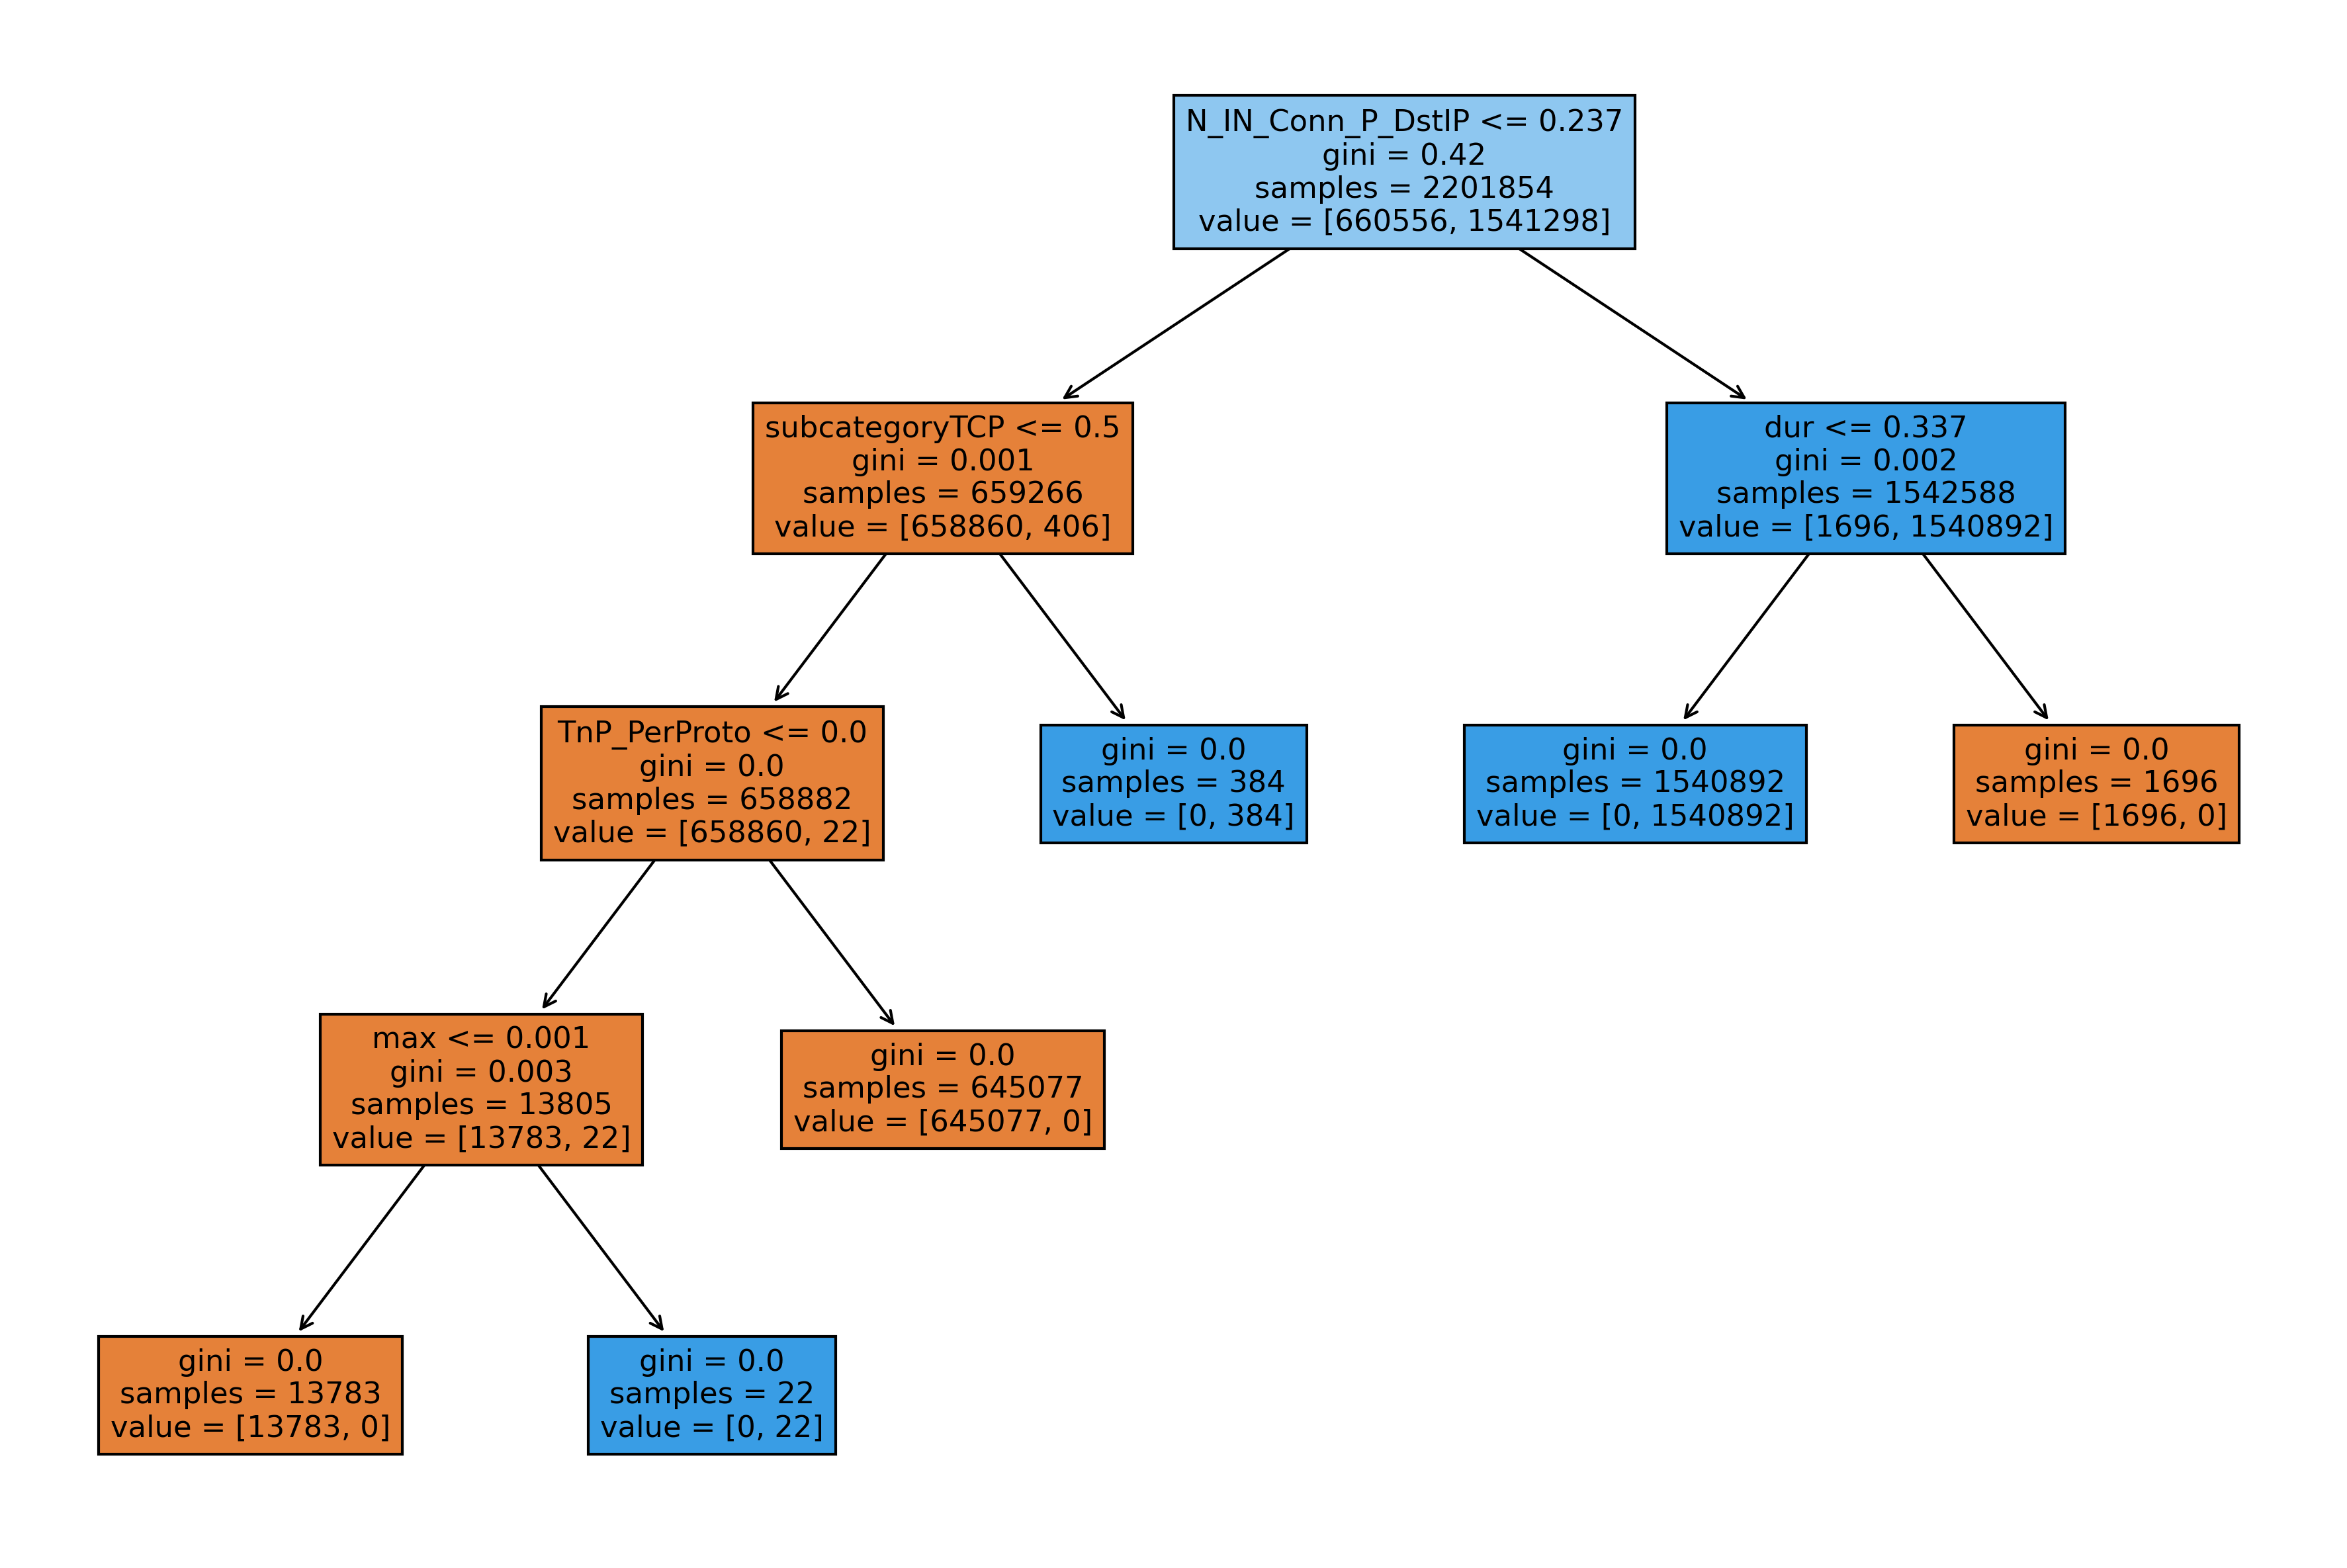

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(clf, feature_names=list(X_train.columns), filled=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers as optimizers

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

model.evaluate(X_test, y_test)


Epoch 1/20
68808/68808 [==============================] - 179s 3ms/step - loss: 2.5215e-04 - accuracy: 1.0000
Epoch 2/20
68808/68808 [==============================] - 174s 3ms/step - loss: 6.0826e-05 - accuracy: 1.0000
Epoch 3/20
68808/68808 [==============================] - 169s 2ms/step - loss: 5.7517e-05 - accuracy: 1.0000
Epoch 4/20
68808/68808 [==============================] - 169s 2ms/step - loss: 2.3973e-04 - accuracy: 1.0000
Epoch 5/20
68808/68808 [==============================] - 171s 2ms/step - loss: 6.0364e-05 - accuracy: 1.0000
Epoch 6/20
68808/68808 [==============================] - 171s 2ms/step - loss: 8.7833e-05 - accuracy: 1.0000
Epoch 7/20
68808/68808 [==============================] - 172s 2ms/step - loss: 9.2787e-05 - accuracy: 1.0000
Epoch 8/20
68808/68808 [==============================] - 174s 3ms/step - loss: 5.9574e-05 - accuracy: 1.0000
Epoch 9/20
68808/68808 [==============================] - 176s 3ms/step - loss: 4.5999e-05 - accuracy: 1.0000
Epoch 10/2

[9.155469732235722e-19, 1.0]

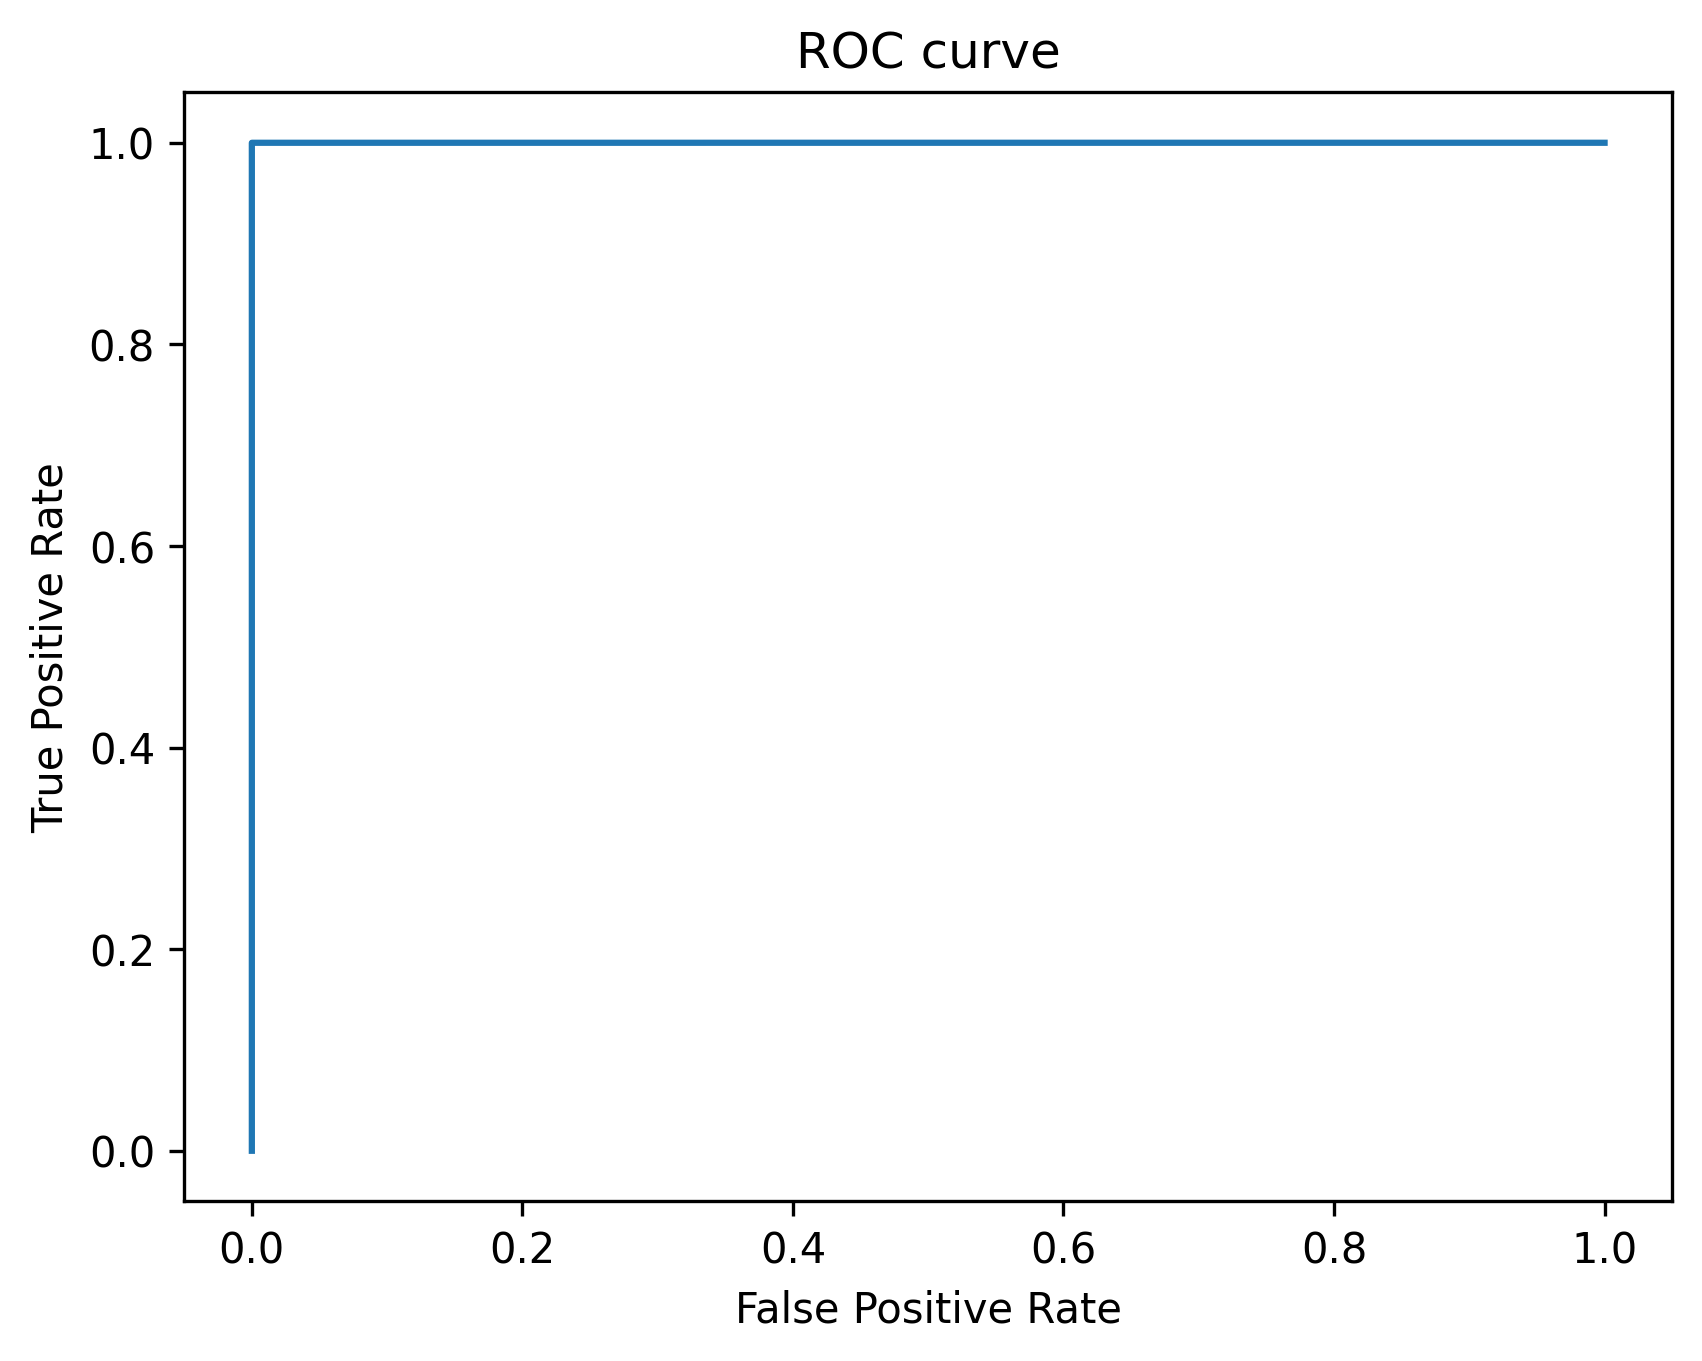

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()